## Import
We import the datas from the generated files.
One can .append() as much files as needed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
plt.rcParams['figure.figsize'] = (15, 7)

base_path_alive_1 = '../Alive/results/vid_2019-08-27_19-45-22_cut/'
path_alive_1 = glob.glob(base_path_alive_1+'*.xlsx')
x_alive_1 = []
y_alive_1 = []
base_path_dead_1 = '../Dead/results/vid_2019-08-27_20-43-37_cut_dead/'
path_dead_1 = glob.glob(base_path_dead_1+'*.xlsx')
x_dead_1 = []
y_dead_1 = []
for p in path_alive_1:
    datas_alive_1 = pd.read_excel(p) 
    x_alive_1.append(datas_alive_1['x, um'][:])
    y_alive_1.append(datas_alive_1['y, um'][:])

for p in path_dead_1:
    datas_dead_1 = pd.read_excel(p) 
    x_dead_1.append(datas_dead_1['x, um'][:])
    y_dead_1.append(datas_dead_1['y, um'][:])
    

In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
 return false;
}


<IPython.core.display.Javascript object>

## Original position
Heare are the original images from video. We can see which cell/yeast we are tracking.

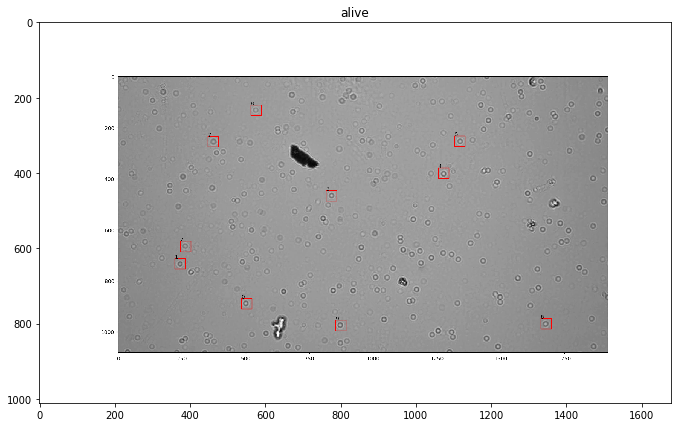

In [2]:
import matplotlib.image as mpimg
for p in glob.glob(base_path_alive_1+'*boxes_selection.png'):
    img = mpimg.imread(p)
    plt.imshow(img)
    plt.title('alive')
    plt.show()

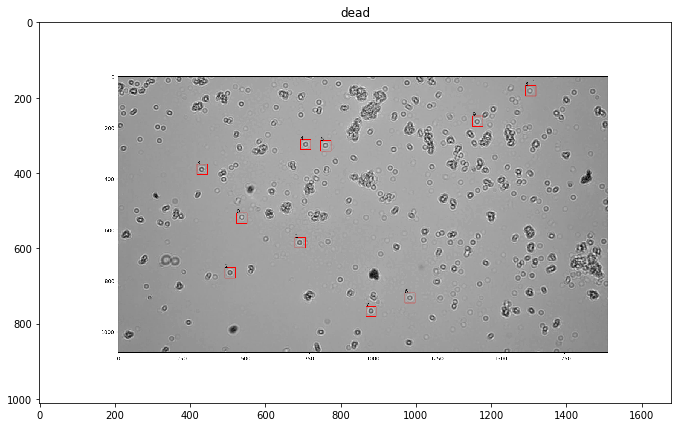

In [3]:
for p in glob.glob(base_path_dead_1+'*boxes_selection.png'):
    img = mpimg.imread(p)
    plt.imshow(img)
    plt.title('dead')
    plt.show()

## Pos preview
To see a bit the shape of the position.

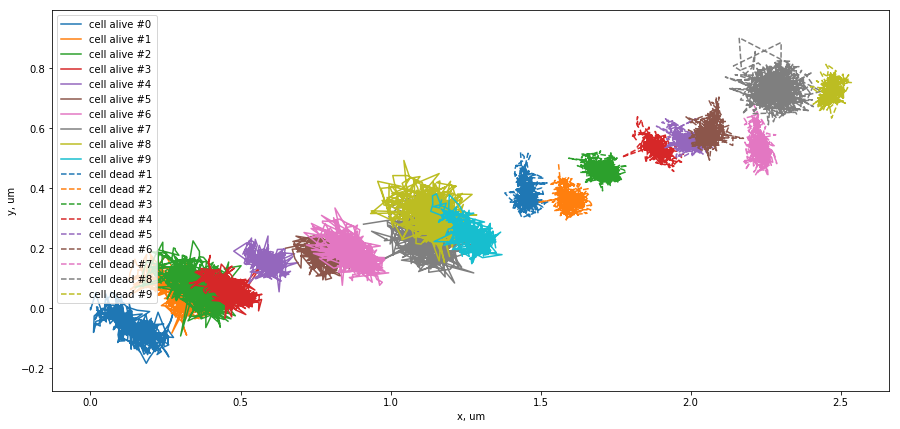

In [4]:
step_x=0.13
step_y=0.04
for i in range(len(x_alive_1)):
    plt.plot(x_alive_1[i]+i*step_x, y_alive_1[i]+i*step_y, label='cell alive #'+str(i), ls='-')
for i in range(1, len(x_dead_1)):
    plt.plot(x_dead_1[i]+(i+len(x_alive_1))*step_x, y_dead_1[i]+(i+len(x_alive_1))*step_y,
             label='cell dead #'+str(i), ls='--')
plt.legend()
plt.axis('equal')
plt.xlabel('x, um')
plt.ylabel('y, um')
plt.show()

## Mean square
Here we calculate the mean square for each frame as $ms_i=\ <(x_{i}-x_0)^2 + (y_{i}-y_0)^2>$, $i\in [1, ..., N]$

We do this to see if this quantity goes as a **Brownian** motion

In [5]:
import csv
ms_t_alive = []
for i in range(len(x_alive_1)):
    l_t=[]
    for j in range(len(x_alive_1[i])):
        x = x_alive_1[i][j] - x_alive_1[i][0]
        y = y_alive_1[i][j] - y_alive_1[i][0]
        l = np.sqrt(x**2 + y**2)
        l_t.append(l)
    ms_l_t=[np.mean(np.square(np.power(l_t[0:k],2))) for k in range(1,len(l_t))]
    ms_t_alive.append(ms_l_t)

df = pd.DataFrame(list(zip(*ms_t_alive))).add_prefix('Cell #')
df.to_csv('alive.csv', index=False)

In [6]:
ms_t_dead = []
for i in range(len(x_dead_1)):
    l_t=[]
    for j in range(len(x_dead_1[i])):
        x = x_dead_1[i][j] - x_dead_1[i][0]
        y = y_dead_1[i][j] - y_dead_1[i][0]
        l = np.sqrt(x**2 + y**2)
        l_t.append(l)
    ms_l_t=[np.mean(np.square(np.power(l_t[0:k],2))) for k in range(1,len(l_t))]
    ms_t_dead.append(ms_l_t)

df = pd.DataFrame(list(zip(*ms_t_dead))).add_prefix('Cell #')
df.to_csv('dead.csv', index=False)

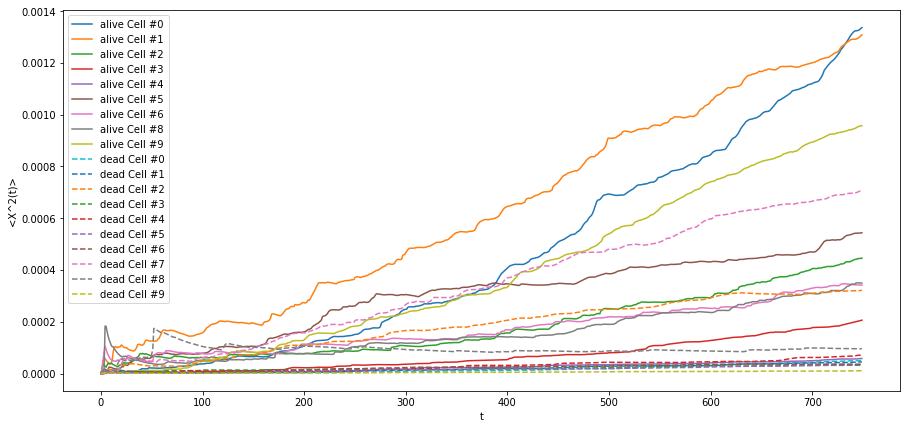

In [7]:
for i in [0, 1, 2, 3, 4, 5, 6, 8, 9]:
    plt.plot(ms_t_alive[i], label='alive Cell #'+str(i), ls='-')
    
for i in range(len(ms_t_dead)):
    plt.plot(ms_t_dead[i], label='dead Cell #'+str(i), ls='--')
plt.legend()
plt.ylabel('<X^2(t)>')
plt.xlabel('t')
plt.show()

## Step for violin
We calculate each step length $s_i=\sqrt{(x_{i+1}-x_i)^2 + (y_{i+1}-y_i)^2}$

In [8]:
shift_length_step_um_alive = []
for i in range(len(x_alive_1)):
    shift_x_step_um = [x_alive_1[i][j+1] - x_alive_1[i][j] for j in range(len(x_alive_1[i]) - 1)]
    shift_y_step_um = [y_alive_1[i][j+1] - y_alive_1[i][j] for j in range(len(y_alive_1[i]) - 1)]
    shift_length_step_um_alive.append(np.sqrt(np.square(shift_x_step_um)+np.square(shift_y_step_um)))

shift_length_step_um_dead = []
for i in range(len(x_dead_1)):
    shift_x_step_um = [x_dead_1[i][j+1] - x_dead_1[i][j] for j in range(len(x_dead_1[i]) - 1)]
    shift_y_step_um = [y_dead_1[i][j+1] - y_dead_1[i][j] for j in range(len(y_dead_1[i]) - 1)]
    shift_length_step_um_dead.append(np.sqrt(np.square(shift_x_step_um)+np.square(shift_y_step_um)))


(10, 750)
(750,)
(10, 125)


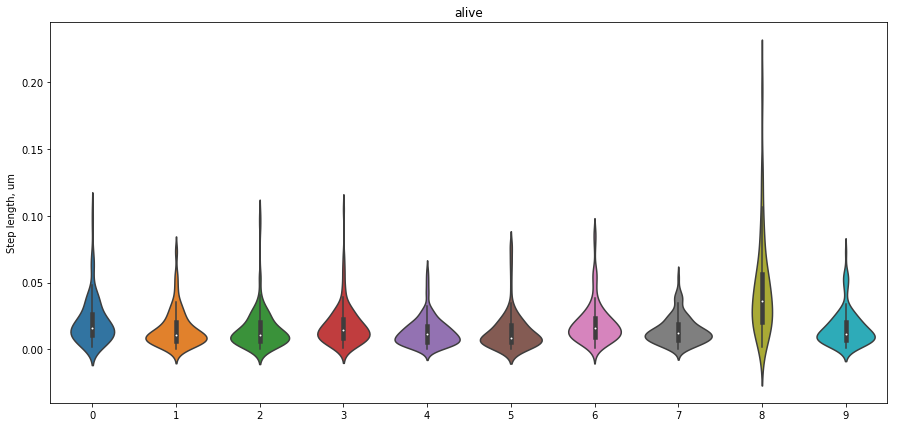

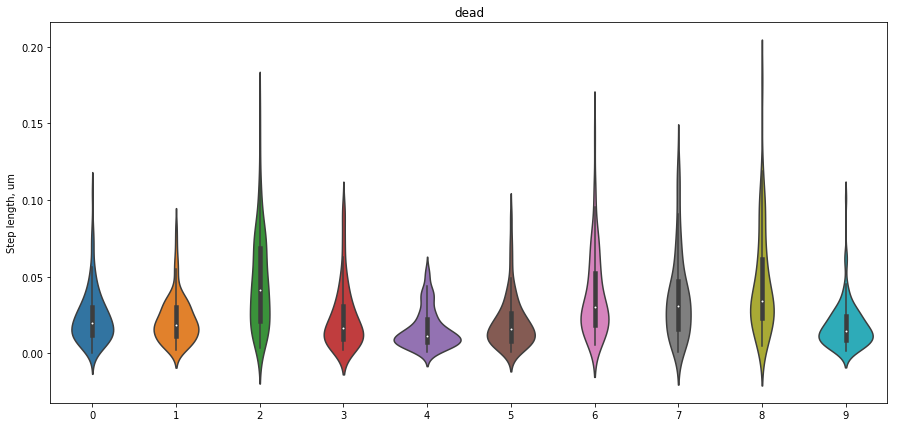

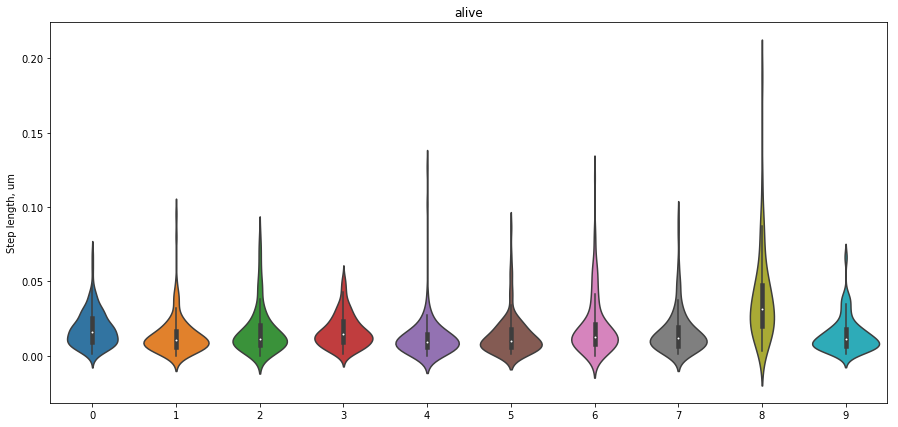

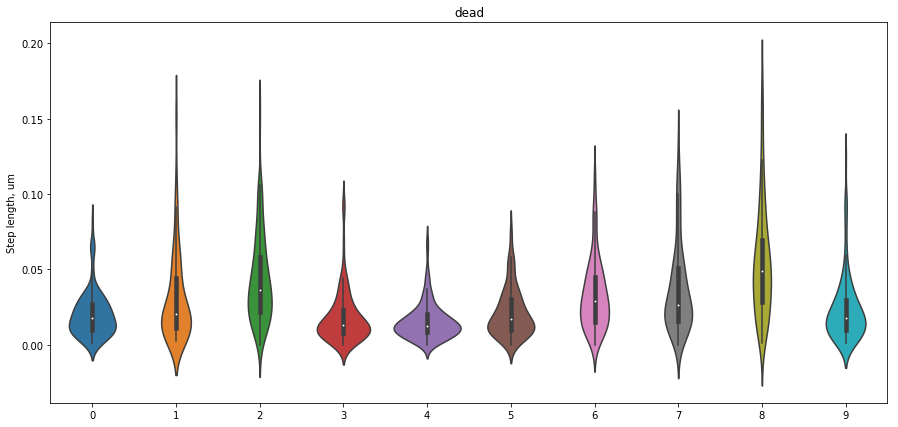

In [21]:

import seaborn as sns
print(np.shape(shift_length_step_um_alive))
print(np.shape(shift_length_step_um_alive[0]))
print(np.shape(sub))

sns.violinplot(data=[i[0:125] for i in shift_length_step_um_dead], label='dead')
plt.title('alive')
plt.legend()
plt.ylabel('Step length, um')
plt.show()

sns.violinplot(data=[i[0:125] for i in shift_length_step_um_alive], label='alive')
plt.title('dead')
plt.legend()
plt.ylabel('Step length, um')
plt.show()

sns.violinplot(data=[i[125:250] for i in shift_length_step_um_dead], label='dead')
plt.title('alive')
plt.legend()
plt.ylabel('Step length, um')
plt.show()

sns.violinplot(data=[i[125:250] for i in shift_length_step_um_alive], label='alive')
plt.title('dead')
plt.legend()
plt.ylabel('Step length, um')
plt.show()